In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
!
import cufflinks as cf

In [149]:
train = pd.read_csv('train_housing.csv')
test = pd.read_csv('test_housing.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [150]:
train.dtypes


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [151]:
train.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

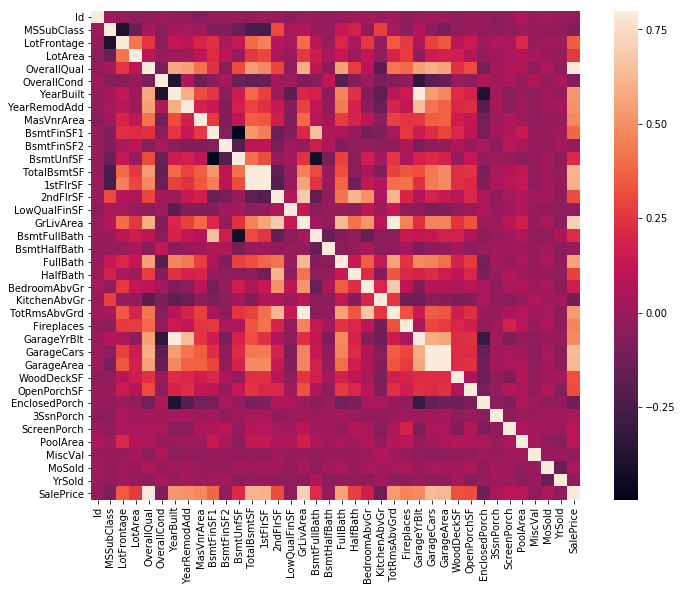

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt
train.head()
train.shape
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [153]:
init_notebook_mode(connected=True)
x = train['OverallQual']
y = train['SalePrice']
plot([go.Scatter(x=x, y=y)])

'temp-plot.html'

In [154]:
x = train['OverallQual']
y = train['SalePrice']
iplot([{'x': x, 'y' : y}])

## Overall Quality vs. Sale Price

In [155]:
x = train['GrLivArea']
y = train['SalePrice']
iplot([{'x': x, 'y' : y}])

## Ground Living Area vs. Sale Price

In [156]:
x = train['GarageArea']
y = train['SalePrice']
iplot([{'x': x, 'y' : y}])

## Garage Area vs. Sale Price

In [157]:
#Make copies of orginal datasets

train_df = train.copy()
test_df = test.copy()

#assign saleprice to target and drop from df 

target = train_df['SalePrice']
train_df = train_df.drop('SalePrice', axis=1)

#create an extra feature to distinguish the two datasets
train_df['training_set'] = True
test_df['training_set'] = False

#concat two dfs together
df_full = pd.concat([train_df, test_df])

In [158]:
df_full.drop('Id', axis=1, inplace=True)

In [159]:
df_full.shape

(2919, 80)

In [160]:
df_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,training_set
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,True
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,True
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,True
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,True
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,True


In [161]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-null object
Exterior2nd      2918 non

In [162]:
df_full.columns.to_series().groupby(df_full.dtypes).groups

{dtype('bool'): Index(['training_set'], dtype='object'),
 dtype('int64'): Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
        'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
        'GarageCars', 'GarageArea'],
       dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'E

In [163]:
# let's get some stats on the 'SalePrice' variable
minimum_price = np.min(target)
maximum_price = np.max(target)
mean_price = np.mean(target)
median_price = np.median(target)
std_price = np.std(target)
print('Min Price ', minimum_price)
print('Max Price', maximum_price)
print('Mean Price', mean_price)
print('Median Price ', median_price)
print('Std of the Price', std_price)

Min Price  34900
Max Price 755000
Mean Price 180921.19589041095
Median Price  163000.0
Std of the Price 79415.29188606751


Text(0.5, 1.0, 'Price')

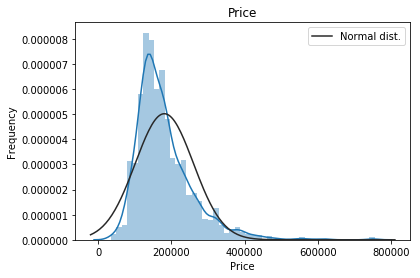

In [164]:
from scipy.stats import norm, skew

#plot a distplot of price
sns.distplot(target, fit=norm)
#add legends to the plot
plt.legend(["Normal dist."],
          loc='best')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title("Price")

In [165]:
target.skew()

1.8828757597682129

Text(0.5, 1.0, 'Log Price')

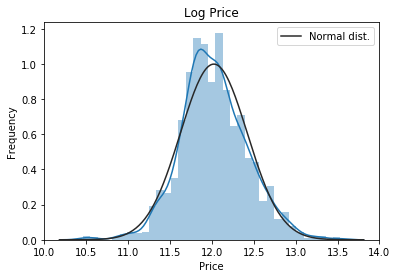

In [166]:
#log transformation
target = np.log(target)

#plot a distplot of log price
sns.distplot(target, fit=norm)
#get mean and Sigma
(mu, sigma) = norm.fit(target)
#add legends to the plot
plt.legend(["Normal dist."],
          loc='best')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title("Log Price")

In [167]:
target.skew()

0.12133506220520406

In [168]:
perc_na = (df_full.isnull().sum()/len(df_full))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({"Missing Ratio" :ratio_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071
GarageYrBlt,5.447071


In [169]:
df_full.drop('PoolQC', axis=1, inplace=True)
df_full.drop("MiscFeature", axis=1, inplace=True)
df_full.drop("Alley", axis=1, inplace=True)
df_full.drop("Fence", axis=1, inplace=True)
df_full.drop("FireplaceQu", axis=1, inplace=True)
df_full.drop("LotFrontage", axis=1, inplace=True)

#dropping Garage Car feature too because of it collinearity with the Garage area feature
df_full.drop('GarageCars', axis =1, inplace=True)

In [170]:
df_full.shape

(2919, 73)

In [171]:
# for the rest we replace null with the median for numerical features and None for Categorical
#first index the numeric features then replace with median
numeric_features = list(df_full.select_dtypes(include=['int64','float64']).columns.values)

df_full[numeric_features] = df_full[numeric_features].apply(lambda x: x.fillna(x.median()), axis=0)


In [172]:
#now the same for categorical features
categorical_features = list(df_full.select_dtypes(exclude=['int64', 'float64', 'bool']).columns.values)

df_full[categorical_features] = df_full[categorical_features].apply(lambda x: x.fillna('None'), axis=0)


In [173]:
#verify that there are no missing values

perc_na = (df_full.isnull().sum()/len(df_full))*100
ratio_na = perc_na.sort_values(ascending=False)
missing_data = pd.DataFrame({"Missing Ratio" :ratio_na})
missing_data.head()

,Missing Ratio
training_set,0.0
TotalBsmtSF,0.0
RoofMatl,0.0
Exterior1st,0.0
Exterior2nd,0.0


In [174]:
# for the categorical features we will use dummie variables

df_full = pd.get_dummies(df_full)

In [175]:
df_full.shape

(2919, 286)

In [176]:
# split dat back up into train and test dfs

df_train = df_full[df_full['training_set']==True]
df_train = df_train.drop('training_set', axis=1)
df_test = df_full[df_full['training_set']==False]
df_test = df_test.drop('training_set', axis=1)

In [177]:
df_train.shape, df_test.shape

((1460, 285), (1459, 285))

In [178]:
from sklearn.model_selection import train_test_split # import 'train_test_split'
from sklearn.ensemble import RandomForestRegressor # import RandomForestRegressor
from sklearn.metrics import r2_score, make_scorer, mean_squared_error # import metrics from sklearn



In [179]:
x_train, x_test, y_train, y_test = train_test_split(df_train, target, random_state=33)

In [196]:
from sklearn.linear_model import LinearRegression


lin_model = LinearRegression(normalize=False)
lin_model.fit(x_train,y_train)
lin_model.score(x_test,y_test)

0.7902520623312673

In [180]:
#number of trees is the n_estimators
# number of cores is set by the number of jobs 

rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1)

In [181]:
#fit standard model
rf_model.fit(x_train, y_train)
y_predict = rf_model.predict(x_test)
rf_model.score(x_test, y_test)

0.8793328298615182

In [182]:
from sklearn.model_selection import GridSearchCV # Search over specified parameter values for an estimator.
from sklearn.model_selection import RandomizedSearchCV # Search over specified parameter values for an estimator.
from sklearn.model_selection import ShuffleSplit # Random permutation cross-validator

rf_regressor = RandomForestRegressor(random_state=33)
#need to shuffle out data for cross validation
cv_sets = ShuffleSplit(random_state=3)
parameters = {'n_estimators':[100, 120, 140],
             'min_samples_leaf':[1, 2, 3],
             'max_depth': [10, 15, 20]}
scorer = make_scorer(r2_score)
n_iter_search = 10

grid_obj = RandomizedSearchCV(rf_regressor,
                         parameters,
                         n_iter = n_iter_search,
                         scoring = scorer,
                         cv = cv_sets,
                         random_state = 99)
grid_fit = grid_obj.fit(x_train, y_train)
rf_opt = grid_fit.best_estimator_



In [183]:
grid_fit.best_params_

{'n_estimators': 120, 'min_samples_leaf': 1, 'max_depth': 15}

In [190]:
opt_rf_score = rf_opt.score(x_test, y_test)
rf_opt_preds = rf_opt.predict(x_test) # optomized RF predictions
print(opt_rf_score)

0.8806226228729321


In [185]:
from sklearn.linear_model import Lasso 
lasso_regr = Lasso(random_state=42)

In [186]:
#shuffle data
cv_sets_lasso = ShuffleSplit(random_state = 20)
#parameters
parameters_lasso = {'alpha':[0.0005,0.001, 0.002, 0.003],
                   'max_iter': [40000,50000,60000]}
scorer_lasso = make_scorer(r2_score)
grid_obj_lasso = RandomizedSearchCV(lasso_regr,
                                   parameters_lasso,
                                   scoring= scorer_lasso,
                                   cv =cv_sets_lasso,
                                   random_state = 99)
grid_fit_lasso = grid_obj_lasso.fit(x_train, y_train)
lasso_opt = grid_fit_lasso.best_estimator_



In [187]:
grid_fit_lasso.best_params_
lasso_2 = Lasso(alpha = 0.0004, max_iter=60000)

In [188]:
lasso_opt.fit(x_train,y_train)
lasso_predict = lasso_opt.predict(x_test)
lasso_2.fit(x_train, y_train)
lasso_2.score(x_test,y_test)

0.814506324810147

In [189]:
r2_lasso = r2_score(y_test, lasso_predict)
rf_r2 = r2_score
print(r2_lasso)

0.8127865716821866


In [197]:
y_predict_log = rf_opt.predict(df_test)
y_predict_final =  np.exp(y_predict_log)

# After trying many different models I went with the RandomForestRegressor, which had the best results.  

In [198]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_predict_final})
my_submission.to_csv('submission-Housing_RF.csv', index=False)

In [199]:
my_submission.head()


,Id,SalePrice
0,1461,124941.263147
1,1462,149889.165040
2,1463,175909.020708
3,1464,182042.030634
4,1465,186585.628766
